In [1]:
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np
from scipy.stats import genpareto
import scipy.stats as stats
import joypy
from scipy.stats import expon
from scipy.stats import genextreme
import matplotlib.cm as cm
import matplotlib.colors as mcolors




In [2]:
df_path='C:/Users/anton/Documents/Master2/Memoire/Scripts/tp_since_1892/Precip_Uccle_1892.csv'
df=pd.read_csv(df_path,delimiter=',')
df['DAY'] = pd.to_datetime(df['DAY'])
df['year'] = df['DAY'].dt.to_period('Y')
df['year_month']=df['DAY'].dt.to_period('M')
df['month']=df['DAY'].dt.month
df.head()   

,DAY,PRECIP_QUANTITY,year,year_month,month
0,1892-01-01,1.94,1892,1892-01,1
1,1892-01-02,0.49,1892,1892-01,1
2,1892-01-03,0.00,1892,1892-01,1
3,1892-01-04,0.00,1892,1892-01,1
4,1892-01-05,0.87,1892,1892-01,1


In [7]:
first_year=1893
last_year=2024
years=np.linspace(first_year,last_year,last_year-first_year+1)

In [3]:
#I want to regroup the years from september first to august 31st

tp_first_8_months = df[df['month']<9].groupby('year')['PRECIP_QUANTITY'].sum().reset_index()
tp_last_4_months = df[df['month']>8].groupby('year')['PRECIP_QUANTITY'].sum().reset_index()

tp_first_8_months['year']=tp_first_8_months['year']
tp_last_4_months['year']=tp_last_4_months['year']+1

tp_seasonal_year = pd.merge(tp_first_8_months,tp_last_4_months, on='year', how='inner')
tp_seasonal_year['TP']=tp_seasonal_year['PRECIP_QUANTITY_x']+tp_seasonal_year['PRECIP_QUANTITY_y']

tp_seasonal_year.head()
#I want a new colomn with 'year-1/year' to have the year of the season. For example 1892-1893 is the season of 1893
tp_seasonal_year['season']=(tp_seasonal_year['year']-1).astype(str)+'-'+(tp_seasonal_year['year']).astype(str)
tp_seasonal_year.head()



,year,PRECIP_QUANTITY_x,PRECIP_QUANTITY_y,TP,season
0,1893,372.86,281.48,654.34,1892-1893
1,1894,500.11,283.52,783.63,1893-1894
2,1895,521.08,342.29,863.37,1894-1895
3,1896,396.22,291.21,687.43,1895-1896
4,1897,555.48,350.89,906.37,1896-1897


In [4]:
tp_first_8_months = df[df['month']<9].groupby('year')['PRECIP_QUANTITY'].sum().reset_index()
tp_last_4_months = df[df['month']>8].groupby('year')['PRECIP_QUANTITY'].sum().reset_index()

tp_first_8_months['year']=tp_first_8_months['year']
tp_last_4_months['year']=tp_last_4_months['year']+1

tp_seasonal_year = pd.merge(tp_first_8_months,tp_last_4_months, on='year', how='inner')
tp_seasonal_year['TP']=tp_seasonal_year['PRECIP_QUANTITY_x']+tp_seasonal_year['PRECIP_QUANTITY_y']

tp_seasonal_year.head()
#I want a new colomn with 'year-1/year' to have the year of the season. For example 1892-1893 is the season of 1893
tp_seasonal_year['season']=(tp_seasonal_year['year']-1).astype(str)+'-'+(tp_seasonal_year['year']).astype(str)
tp_seasonal_year.head()


,year,PRECIP_QUANTITY_x,PRECIP_QUANTITY_y,TP,season
0,1893,372.86,281.48,654.34,1892-1893
1,1894,500.11,283.52,783.63,1893-1894
2,1895,521.08,342.29,863.37,1894-1895
3,1896,396.22,291.21,687.43,1895-1896
4,1897,555.48,350.89,906.37,1896-1897


In [5]:
#how many rainy days per seasonal year
wd=[]

for this_year in tp_seasonal_year['year']:
    ano = f'{this_year-1}'
    ano_mas=f'{this_year}'  # Adjust for the year format
    tp_concat = pd.concat([df[(df['year'] == ano_mas) & (df['month'] < 9)],
                           df[(df['year'] == ano) & (df['month'] > 8)]])
    tp_concat_rainy=tp_concat[tp_concat['PRECIP_QUANTITY']>1]
    cumsum = 0
    days_count = 0 
    for index, row in tp_concat_rainy.iterrows():
        cumsum += row['PRECIP_QUANTITY']
        days_count += 1 
    wd.append(days_count)




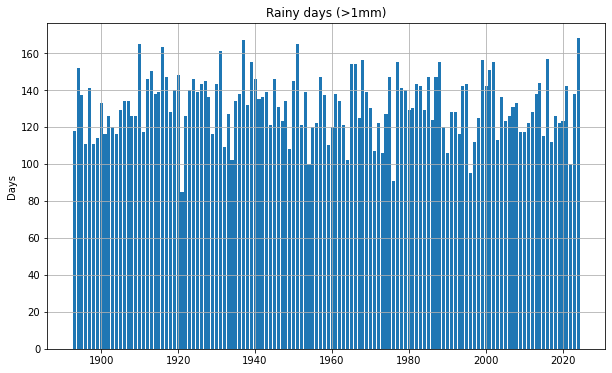

131.81060606060606


In [8]:
#plot these data
plt.figure(figsize=(10, 6))
plt.bar(years, wd)
plt.ylabel('Days')
plt.title('Rainy days (>1mm)')
plt.grid()
plt.show()
print(np.mean(wd))
  